In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look nicer
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Load the dataset
df = pd.read_csv("HeartAttackData.csv")

# Quick look at the data
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [3]:
# Basic dataset info
print("Shape of dataset:", df.shape)   # rows, columns
print("\nColumn names:", df.columns.tolist())
print("\nData types:\n", df.dtypes)

# Summary statistics
df.describe()

# Check for missing values
df.isnull().sum()

# Count total duplicate rows
duplicate_count = df.duplicated().sum()
print(f"\nTotal duplicate rows: {duplicate_count}")

Shape of dataset: (8763, 26)

Column names: ['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems', 'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country', 'Continent', 'Hemisphere', 'Heart Attack Risk']

Data types:
 Patient ID                          object
Age                                  int64
Sex                                 object
Cholesterol                          int64
Blood Pressure                      object
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
D

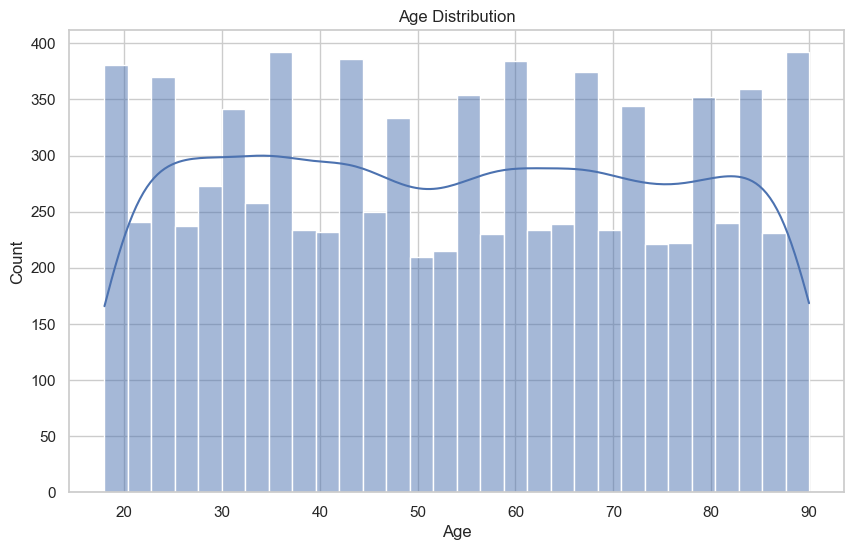

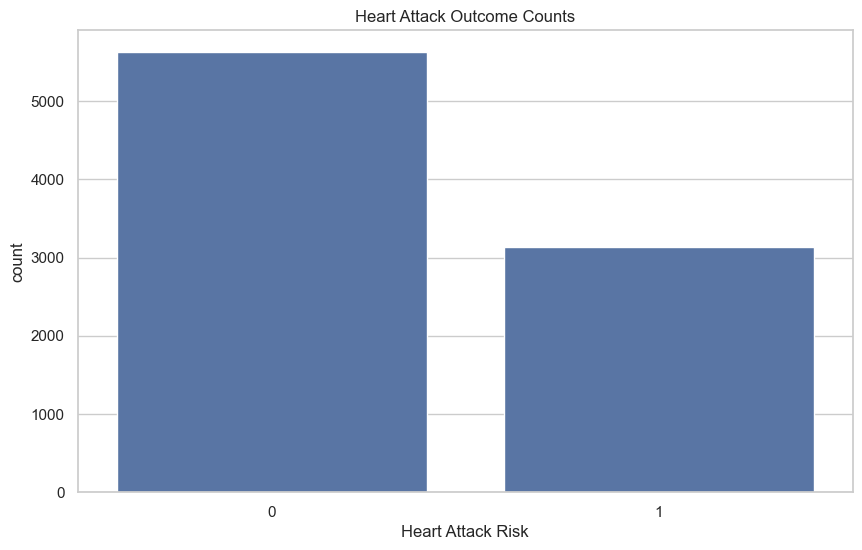

In [14]:
# Univariate analysis
# Example: distribution of age
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

# Example: count of target variable (heart attack yes/no)
sns.countplot(x='Heart Attack Risk', data=df)
plt.title("Heart Attack Outcome Counts")
plt.show()

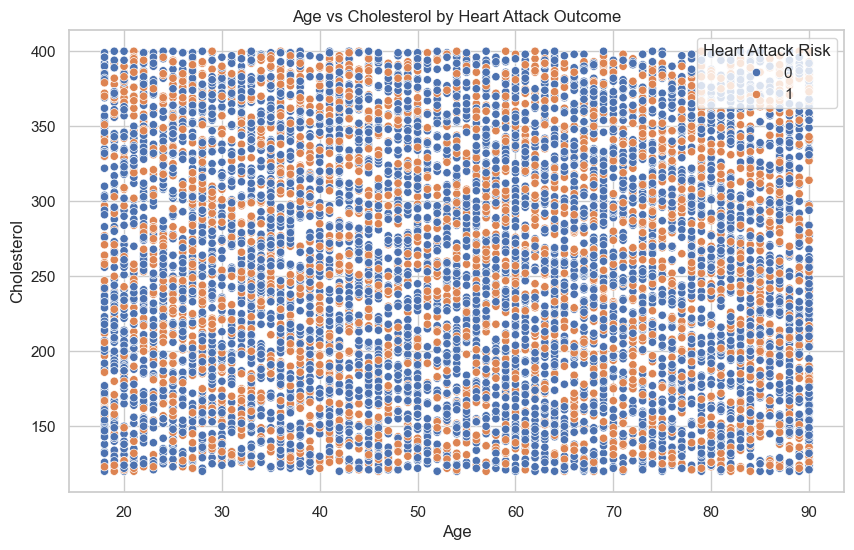

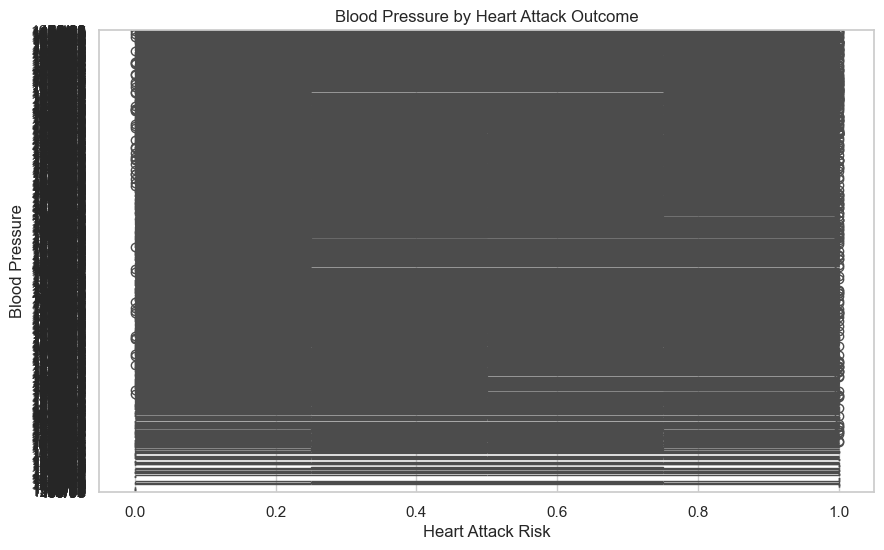

In [15]:
# Bivariate analysis
# Age vs. cholesterol
sns.scatterplot(x='Age', y='Cholesterol', hue='Heart Attack Risk', data=df)
plt.title("Age vs Cholesterol by Heart Attack Outcome")
plt.show()

# Boxplot: blood pressure by outcome
sns.boxplot(x='Heart Attack Risk', y='Blood Pressure', data=df)
plt.title("Blood Pressure by Heart Attack Outcome")
plt.show()

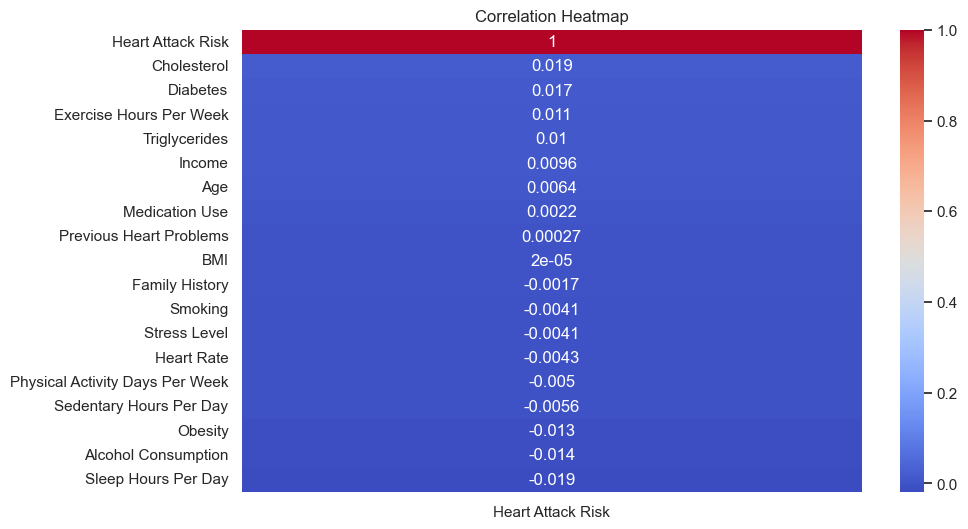

In [16]:
# Correlation analysis
corr = df.corr(numeric_only=True)  # only numeric columns

# Show only correlations with the target column
sns.heatmap(df.corr(numeric_only=True)[['Heart Attack Risk']].sort_values(by='Heart Attack Risk', ascending=False), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [17]:
# Next steps
# Handle missing values (drop or impute)
# Encode categorical variables (e.g., gender: male/female → 0/1)
# Normalize/scale features if needed
# Split into train/test sets for modeling

In [4]:
print(df.nunique())

Patient ID                         8763
Age                                  73
Sex                                   2
Cholesterol                         281
Blood Pressure                     3915
Heart Rate                           71
Diabetes                              2
Family History                        2
Smoking                               2
Obesity                               2
Alcohol Consumption                   2
Exercise Hours Per Week            8763
Diet                                  3
Previous Heart Problems               2
Medication Use                        2
Stress Level                         10
Sedentary Hours Per Day            8763
Income                             8615
BMI                                8763
Triglycerides                       771
Physical Activity Days Per Week       8
Sleep Hours Per Day                   7
Country                              20
Continent                             6
Hemisphere                            2


In [5]:
print(df.describe())

               Age  Cholesterol   Heart Rate     Diabetes  Family History  \
count  8763.000000  8763.000000  8763.000000  8763.000000     8763.000000   
mean     53.707977   259.877211    75.021682     0.652288        0.492982   
std      21.249509    80.863276    20.550948     0.476271        0.499979   
min      18.000000   120.000000    40.000000     0.000000        0.000000   
25%      35.000000   192.000000    57.000000     0.000000        0.000000   
50%      54.000000   259.000000    75.000000     1.000000        0.000000   
75%      72.000000   330.000000    93.000000     1.000000        1.000000   
max      90.000000   400.000000   110.000000     1.000000        1.000000   

           Smoking      Obesity  Alcohol Consumption  Exercise Hours Per Week  \
count  8763.000000  8763.000000          8763.000000              8763.000000   
mean      0.896839     0.501426             0.598083                10.014284   
std       0.304186     0.500026             0.490313           

In [9]:
print(df.corr(numeric_only=True))

                                      Age  Cholesterol  Heart Rate  Diabetes  \
Age                              1.000000    -0.009107   -0.003844 -0.014105   
Cholesterol                     -0.009107     1.000000    0.000315 -0.013428   
Heart Rate                      -0.003844     0.000315    1.000000  0.006764   
Diabetes                        -0.014105    -0.013428    0.006764  1.000000   
Family History                   0.008353    -0.021608   -0.013470 -0.013844   
Smoking                          0.394891     0.016342   -0.012331  0.000527   
Obesity                         -0.008140    -0.014843    0.012725  0.012866   
Alcohol Consumption             -0.006666    -0.007261    0.003459  0.005551   
Exercise Hours Per Week          0.001206     0.021517    0.008276 -0.007014   
Previous Heart Problems          0.000868    -0.006070   -0.004956  0.000867   
Medication Use                   0.000980    -0.000905    0.009244 -0.002656   
Stress Level                     0.01830